## Figure 5 (Journal of Climate submission; Molina et al.)

Fig. 5. Variance of area weighted averages of annual SSTs ($^{\circ}$C) computed using a 30-year centered rolling mean across various regions of the Pacific and Atlantic basins, as indicated on the global map with black polygons. The temporal period of AMOC collapse is shown for the sensitivity simulations (years 201-500), except for the Pacific Salt experiment, which only contains the overlap years of an active PMOC (years 201-250) given the shortened duration of the experiment. The CESM1 control for the corresponding time period is also shown (years 1,001-1,300), as well as present day observations (OISST; years 1982-2020), all indicated in the legend. The lower-left and upper-right coordinates for the oceanic regions of interest are indicated in the plot titles.

**Figure by: Maria J. Molina, NCAR**

In [4]:
# imports 

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cftime
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from climatico.util import weighted_mean, pacific_lon
import matplotlib.patches as mpatches
import cartopy.feature as cfeature
from shapely.geometry.polygon import Polygon
from datetime import timedelta

In [5]:
from config import directory_figs, directory_data

In [6]:
# list of filenames to do this for

file_g02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.*.nc'
file_g04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.SST.*.nc'
file_p02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.SST.*.nc'
file_p04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.SST.*.nc'
file_psalt = 'b1d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.SST.*.nc'
file_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.SST.*.nc'
obs_oissts = '/gpfs/fs1/collections/rda/data/ds277.7/avhrr_v2.1/*/oisst-avhrr-v02r01.*.nc'

In [7]:
ds_cntrl = xr.open_mfdataset(f'{directory_data}{file_cntrl}', combine='by_coords')
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))
ds_cntrl = ds_cntrl.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(1001, 1, 1, 0, 0),cftime.DatetimeNoLeap(1301, 1, 1, 0, 0)))

ds_g02sv = xr.open_mfdataset(f'{directory_data}{file_g02sv}', combine='by_coords')
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
ds_g02sv = ds_g02sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))

ds_g04sv = xr.open_mfdataset(f'{directory_data}{file_g04sv}', combine='by_coords')
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
ds_g04sv = ds_g04sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))

ds_p02sv = xr.open_mfdataset(f'{directory_data}{file_p02sv}', combine='by_coords')
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
ds_p02sv = ds_p02sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))

ds_p04sv = xr.open_mfdataset(f'{directory_data}{file_p04sv}', combine='by_coords')
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
ds_p04sv = ds_p04sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))

ds_psalt = xr.open_mfdataset(f'{directory_data}{file_psalt}', combine='by_coords')
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
ds_psalt = ds_psalt.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(101, 1, 1, 0, 0),cftime.DatetimeNoLeap(251, 1, 1, 0, 0)))

ds_oisst = xr.open_mfdataset(f'{obs_oissts}', combine='by_coords')
ds_oisst = ds_oisst.isel(zlev=0)['sst'].sel(time=slice('1982-01-01','2020-12-31')).resample(time='MS').mean(skipna=True)

In [8]:
def grab_variance(ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst = None, obs = False,
                  lon1 = 170.5, lon2 = -150.5, lat1 = 30.5, lat2 = 40.5):
    """
    Region to take weighted mean and variance for.
    
    """
    if obs == False:
        try:
            assert ds_oisst == None
            print("passed, no ds_oisst")
        except ValueError:
            print("ds_oisst not None, set obs to True")

    if obs == True:
        try:
            assert ds_oisst == None
            print("please insert ds_oisst")
        except ValueError:
            print("passed, ds_oisst data input")
    
    ds_cntrl_box = weighted_mean(ds_cntrl.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_g02sv_box = weighted_mean(ds_g02sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_g04sv_box = weighted_mean(ds_g04sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_p02sv_box = weighted_mean(ds_p02sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_p04sv_box = weighted_mean(ds_p04sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_psalt_box = weighted_mean(ds_psalt.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')
    
    if obs:
        
        ds_oisst_box = weighted_mean(ds_oisst.sel(
            lon=slice(pacific_lon(lon1, to180=False),
                      pacific_lon(lon2, to180=False)), 
            lat=slice(lat1,lat2)), 
                      lat_name='lat')
    
    ds_cntrl_box_var = ds_cntrl_box.resample(time='AS').mean(skipna=True).chunk({'time': 1200}).rolling(time=30, min_periods=15, center=True).var().values
    ds_g02sv_box_var = ds_g02sv_box.resample(time='AS').mean(skipna=True).chunk({'time': 1200}).rolling(time=30, min_periods=15, center=True).var().values
    ds_g04sv_box_var = ds_g04sv_box.resample(time='AS').mean(skipna=True).chunk({'time': 1200}).rolling(time=30, min_periods=15, center=True).var().values
    ds_p02sv_box_var = ds_p02sv_box.resample(time='AS').mean(skipna=True).chunk({'time': 1200}).rolling(time=30, min_periods=15, center=True).var().values
    ds_p04sv_box_var = ds_p04sv_box.resample(time='AS').mean(skipna=True).chunk({'time': 1200}).rolling(time=30, min_periods=15, center=True).var().values
    ds_psalt_box_var = ds_psalt_box.resample(time='AS').mean(skipna=True).chunk({'time': None}).rolling(time=30, min_periods=15, center=True).var().values

    if not obs:
        return ds_cntrl_box_var, ds_g02sv_box_var, ds_g04sv_box_var, ds_p02sv_box_var, ds_p04sv_box_var, ds_psalt_box_var
    
    if obs:
        ds_psalt_box_var = ds_oisst_box.resample(time='AS').mean(skipna=True).chunk({'time': None}).rolling(time=30, min_periods=15, center=True).var().values
        return ds_cntrl_box_var, ds_g02sv_box_var, ds_g04sv_box_var, ds_p02sv_box_var, ds_p04sv_box_var, ds_psalt_box_var, ds_psalt_box_var

In [9]:
%%capture

# north pacific
ds_cntrl_box1_var, ds_g02sv_box1_var, ds_g04sv_box1_var, ds_p02sv_box1_var, ds_p04sv_box1_var, ds_psalt_box1_var, ds_oisst_box1_var = grab_variance(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True,
    lon1 = 170.5, lon2 = -150.5, lat1 = 30.5, lat2 = 40.5)

# north atlantic
ds_cntrl_box2_var, ds_g02sv_box2_var, ds_g04sv_box2_var, ds_p02sv_box2_var, ds_p04sv_box2_var, ds_psalt_box2_var, ds_oisst_box2_var = grab_variance(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True,
    lon1 = -50.5, lon2 = -20.5, lat1 = 30.5, lat2 = 40.5)

# equatorial pacific
ds_cntrl_box3_var, ds_g02sv_box3_var, ds_g04sv_box3_var, ds_p02sv_box3_var, ds_p04sv_box3_var, ds_psalt_box3_var, ds_oisst_box3_var = grab_variance(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True,
    lon1 = -170.5, lon2 = -120.5, lat1 = -10.5, lat2 = 10.5)

# south pacific
ds_cntrl_box4_var, ds_g02sv_box4_var, ds_g04sv_box4_var, ds_p02sv_box4_var, ds_p04sv_box4_var, ds_psalt_box4_var, ds_oisst_box4_var = grab_variance(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True,
    lon1 = -160.5, lon2 = -110.5, lat1 = -40.5, lat2 = -30.5)

# south atlantic
ds_cntrl_box5_var, ds_g02sv_box5_var, ds_g04sv_box5_var, ds_p02sv_box5_var, ds_p04sv_box5_var, ds_psalt_box5_var, ds_oisst_box5_var = grab_variance(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True,
    lon1 = -30.5, lon2 = -0.5, lat1 = -40.5, lat2 = -30.5)

# equatorial atlantic
ds_cntrl_box6_var, ds_g02sv_box6_var, ds_g04sv_box6_var, ds_p02sv_box6_var, ds_p04sv_box6_var, ds_psalt_box6_var, ds_oisst_box6_var = grab_variance(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True,
    lon1 = -20.5, lon2 = -0.5, lat1 = -3.5, lat2 = 3.5)

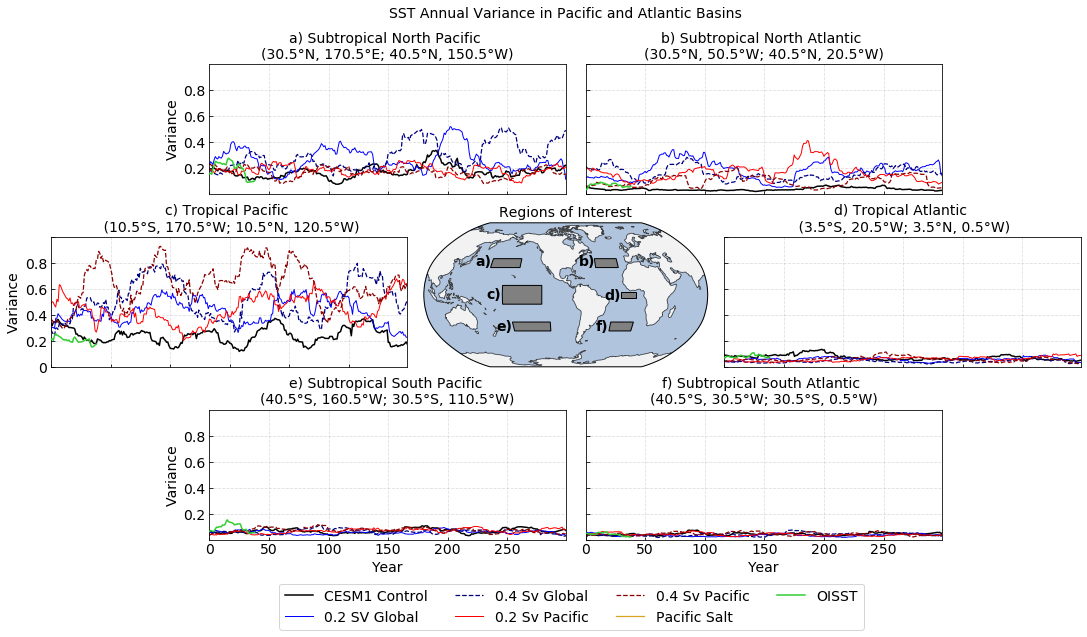

In [12]:
# --------------

a = u"\u00b0"

fig = plt.figure(figsize=(11,8))

fig.suptitle('SST Annual Variance in Pacific and Atlantic Basins', x=0.525, y=0.925, fontsize=14)

# --------------

ax0 = plt.axes([0.325, 0.3, 0.4, 0.25], projection=ccrs.Robinson(central_longitude=270))
ax0.set_title('Regions of Interest', fontsize=14)

ax0.set_global()
ax0.coastlines(resolution='110m', color='0.25', linewidth=0.75)
ax0.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax0.add_feature(cartopy.feature.OCEAN, facecolor='lightsteelblue')

# equatorial atlantic
lat_corners = np.array([ -3.5, 3.5, 3.5, -3.5])
lon_corners = np.array([ -20.5+360, -20.5+360, -0.5+360, -0.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=True, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree())
ax0.add_patch(poly)

# south atlantic
lat_corners = np.array([ -40.5, -30.5, -30.5, -40.5])
lon_corners = np.array([ -30.5+360, -30.5+360, -0.5+360, -0.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=True, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree())
ax0.add_patch(poly)

# south pacific
lat_corners = np.array([ -40.5, -30.5, -30.5, -40.5])
lon_corners = np.array([ -160.5+360, -160.5+360, -110.5+360, -110.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=True, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree())
ax0.add_patch(poly)

# equatorial pacific
lat_corners = np.array([ -10.5, 10.5, 10.5, -10.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=True, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree())
ax0.add_patch(poly)

# north atlantic
lat_corners = np.array([ 30.5, 40.5, 40.5, 30.5])
lon_corners = np.array([ -50.5+360, -50.5+360, -20.5+360, -20.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=True, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree())
ax0.add_patch(poly)

# north pacific
lat_corners = np.array([ 30.5, 40.5, 40.5, 30.5])
lon_corners = np.array([ 170.5, 170.5, -150.5+360, -150.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=True, ec='k', facecolor='grey', lw=1, transform=ccrs.PlateCarree())
ax0.add_patch(poly)

# --------------

ax1 = plt.axes([0.075, 0.6, 0.45, 0.225])
ax1.set_title(f'a) Subtropical North Pacific \n(30.5'+a+'N, 170.5'+a+'E; 40.5'+a+'N, 150.5'+a+'W)', fontsize=14)

ln_ct, = ax1.plot(np.arange(0,
                   ds_cntrl_box1_var.shape[0]),
                   ds_cntrl_box1_var, lw=1.5, c='k')

ln_g2, = ax1.plot(np.arange(0,
                   ds_g02sv_box1_var.shape[0]),
                   ds_g02sv_box1_var, lw=1., c='b')

ln_g4, = ax1.plot(np.arange(0,
                   ds_g04sv_box1_var.shape[0]),
                   ds_g04sv_box1_var, lw=1.25, c='navy', ls='--')

ln_p2, = ax1.plot(np.arange(0,
                   ds_p02sv_box1_var.shape[0]),
                   ds_p02sv_box1_var, lw=1., c='red')

ln_p4, = ax1.plot(np.arange(0,
                   ds_p04sv_box1_var.shape[0]),
                   ds_p04sv_box1_var, lw=1.25, c='darkred', ls='--')

ln_p5, = ax1.plot(np.arange(0,
                   ds_psalt_box1_var[100:].shape[0]),
                   ds_psalt_box1_var[100:], lw=1.25, c='goldenrod', ls='-')

ln_p6, = ax1.plot(np.arange(0,
                   ds_oisst_box1_var[:].shape[0]),
                   ds_oisst_box1_var[:], lw=1.5, c='limegreen', ls='-', zorder=10)

ax1.margins(x=0)
ax1.set_ylim([0,1.])
ax1.tick_params(axis='both', labelleft=True, direction='in', labelbottom=False)
ax1.set_yticks([0.2,0.4,0.6,0.8])
ax1.set_yticklabels([0.2,0.4,0.6,0.8], fontsize=14)
ax1.grid(alpha=0.4, ls='--')
ax1.set_ylabel('Variance', fontsize=14)

# --------------

ax2 = plt.axes([0.55, 0.6, 0.45, 0.225])
ax2.set_title('b) Subtropical North Atlantic \n(30.5'+a+'N, 50.5'+a+'W; 40.5'+a+'N, 20.5'+a+'W)', fontsize=14)

ax2.plot(np.arange(0,
                   ds_cntrl_box2_var.shape[0]),
                   ds_cntrl_box2_var, lw=1.5, c='k')

ax2.plot(np.arange(0,
                   ds_g02sv_box2_var.shape[0]),
                   ds_g02sv_box2_var, lw=1., c='b')

ax2.plot(np.arange(0,
                   ds_g04sv_box2_var.shape[0]),
                   ds_g04sv_box2_var, lw=1.25, c='navy', ls='--')

ax2.plot(np.arange(0,
                   ds_p02sv_box2_var.shape[0]),
                   ds_p02sv_box2_var, lw=1., c='red')

ax2.plot(np.arange(0,
                   ds_p04sv_box2_var.shape[0]),
                   ds_p04sv_box2_var, lw=1.25, c='darkred', ls='--')

ax2.plot(np.arange(0,
                   ds_psalt_box2_var[100:].shape[0]),
                   ds_psalt_box2_var[100:], lw=1.25, c='goldenrod', ls='-')

ax2.plot(np.arange(0,
                   ds_oisst_box2_var[:].shape[0]),
                   ds_oisst_box2_var[:], lw=1.5, c='limegreen', ls='-', zorder=10)

ax2.margins(x=0)
ax2.set_ylim([0,1.])
ax2.tick_params(axis='both', labelleft=False, direction='in', labelbottom=False)
ax2.grid(alpha=0.4, ls='--')

# --------------

ax3 = plt.axes([-0.125, 0.3, 0.45, 0.225])
ax3.set_title('c) Tropical Pacific \n (10.5'+a+'S, 170.5'+a+'W; 10.5'+a+'N, 120.5'+a+'W)', fontsize=14)

ax3.plot(np.arange(0,
                   ds_cntrl_box3_var.shape[0]),
                   ds_cntrl_box3_var, lw=1.5, c='k')

ax3.plot(np.arange(0,
                   ds_g02sv_box3_var.shape[0]),
                   ds_g02sv_box3_var, lw=1., c='b')

ax3.plot(np.arange(0,
                   ds_g04sv_box3_var.shape[0]),
                   ds_g04sv_box3_var, lw=1.25, c='navy', ls='--')

ax3.plot(np.arange(0,
                   ds_p02sv_box3_var.shape[0]),
                   ds_p02sv_box3_var, lw=1., c='red')

ax3.plot(np.arange(0,
                   ds_p04sv_box3_var.shape[0]),
                   ds_p04sv_box3_var, lw=1.25, c='darkred', ls='--')

ax3.plot(np.arange(0,
                   ds_psalt_box3_var[100:].shape[0]),
                   ds_psalt_box3_var[100:], lw=1.25, c='goldenrod', ls='-')

ax3.plot(np.arange(0,
                   ds_oisst_box3_var[:].shape[0]),
                   ds_oisst_box3_var[:], lw=1.5, c='limegreen', ls='-', zorder=10)

ax3.margins(x=0)
ax3.set_ylim([0,1.])
ax3.tick_params(axis='both', labelleft=True, direction='in', labelbottom=False)
ax3.set_yticklabels([0,0.2,0.4,0.6,0.8], fontsize=14)
ax3.grid(alpha=0.4, ls='--')
ax3.set_ylabel('Variance', fontsize=14)

# --------------

ax4 = plt.axes([0.725, 0.3, 0.45, 0.225])
ax4.set_title('d) Tropical Atlantic \n (3.5'+a+'S, 20.5'+a+'W; 3.5'+a+'N, 0.5'+a+'W)', fontsize=14)

ax4.plot(np.arange(0,
                   ds_cntrl_box6_var.shape[0]),
                   ds_cntrl_box6_var, lw=1.5, c='k')

ax4.plot(np.arange(0,
                   ds_g02sv_box6_var.shape[0]),
                   ds_g02sv_box6_var, lw=1., c='b')

ax4.plot(np.arange(0,
                   ds_g04sv_box6_var.shape[0]),
                   ds_g04sv_box6_var, lw=1.25, c='navy', ls='--')

ax4.plot(np.arange(0,
                   ds_p02sv_box6_var.shape[0]),
                   ds_p02sv_box6_var, lw=1., c='red')

ax4.plot(np.arange(0,
                   ds_p04sv_box6_var.shape[0]),
                   ds_p04sv_box6_var, lw=1.25, c='darkred', ls='--')

ax4.plot(np.arange(0,
                   ds_psalt_box6_var[100:].shape[0]),
                   ds_psalt_box6_var[100:], lw=1.25, c='goldenrod', ls='-')

ax4.plot(np.arange(0,
                   ds_oisst_box6_var[:].shape[0]),
                   ds_oisst_box6_var[:], lw=1.5, c='limegreen', ls='-', zorder=10)

ax4.margins(x=0)
ax4.set_ylim([0,1.])
ax4.tick_params(axis='both', labelleft=False, direction='in', labelbottom=False)
ax4.grid(alpha=0.4, ls='--')

# --------------

ax5 = plt.axes([0.075, 0., 0.45, 0.225])
ax5.set_title('e) Subtropical South Pacific \n(40.5'+a+'S, 160.5'+a+'W; 30.5'+a+'S, 110.5'+a+'W)', fontsize=14)

ln_ct, = ax5.plot(np.arange(0,
                   ds_cntrl_box4_var.shape[0]),
                   ds_cntrl_box4_var, lw=1.5, c='k')

ln_g2, = ax5.plot(np.arange(0,
                   ds_g02sv_box4_var.shape[0]),
                   ds_g02sv_box4_var, lw=1., c='b')

ln_g4, = ax5.plot(np.arange(0,
                   ds_g04sv_box4_var.shape[0]),
                   ds_g04sv_box4_var, lw=1.25, c='navy', ls='--')

ln_p2, = ax5.plot(np.arange(0,
                   ds_p02sv_box4_var.shape[0]),
                   ds_p02sv_box4_var, lw=1., c='red')

ln_p4, = ax5.plot(np.arange(0,
                   ds_p04sv_box4_var.shape[0]),
                   ds_p04sv_box4_var, lw=1.25, c='darkred', ls='--')

ax5.plot(np.arange(0,
                   ds_psalt_box4_var[100:].shape[0]),
                   ds_psalt_box4_var[100:], lw=1.25, c='goldenrod', ls='-')

ax5.plot(np.arange(0,
                   ds_oisst_box4_var[:].shape[0]),
                   ds_oisst_box4_var[:], lw=1.5, c='limegreen', ls='-', zorder=10)

ax5.margins(x=0)
ax5.set_ylim([0,1.])
ax5.tick_params(axis='both', labelleft=True, direction='in', labelbottom=True)
ax5.set_xticklabels([0,50,100,150,200,250], fontsize=14)
ax5.set_yticks([0.2,0.4,0.6,0.8])
ax5.set_yticklabels([0.2,0.4,0.6,0.8], fontsize=14)
ax5.set_xlabel('Year', fontsize=14)
ax5.grid(alpha=0.4, ls='--')
ax5.set_ylabel('Variance', fontsize=14)

# --------------

ax6 = plt.axes([0.55, 0., 0.45, 0.225])
ax6.set_title('f) Subtropical South Atlantic \n(40.5'+a+'S, 30.5'+a+'W; 30.5'+a+'S, 0.5'+a+'W)', fontsize=14)

ax6.plot(np.arange(0,
                   ds_cntrl_box5_var.shape[0]),
                   ds_cntrl_box5_var, lw=1.5, c='k')

ax6.plot(np.arange(0,
                   ds_g02sv_box5_var.shape[0]),
                   ds_g02sv_box5_var, lw=1., c='b')

ax6.plot(np.arange(0,
                   ds_g04sv_box5_var.shape[0]),
                   ds_g04sv_box5_var, lw=1.25, c='navy', ls='--')

ax6.plot(np.arange(0,
                   ds_p02sv_box5_var.shape[0]),
                   ds_p02sv_box5_var, lw=1., c='red')

ax6.plot(np.arange(0,
                   ds_p04sv_box5_var.shape[0]),
                   ds_p04sv_box5_var, lw=1.25, c='darkred', ls='--')

ax6.plot(np.arange(0,
                   ds_psalt_box5_var[100:].shape[0]),
                   ds_psalt_box5_var[100:], lw=1.25, c='goldenrod', ls='-')

ax6.plot(np.arange(0,
                   ds_oisst_box5_var[:].shape[0]),
                   ds_oisst_box5_var[:], lw=1.5, c='limegreen', ls='-', zorder=10)

ax6.margins(x=0)
ax6.set_ylim([0,1.])
ax6.tick_params(axis='both', labelleft=False, direction='in', labelbottom=True)
ax6.set_xticklabels([0,50,100,150,200,250], fontsize=14)
ax6.set_xlabel('Year', fontsize=14)
ax6.grid(alpha=0.4, ls='--')

ax6.legend([ln_ct, ln_g2, ln_g4, ln_p2, ln_p4, ln_p5, ln_p6], 
           ['CESM1 Control', '0.2 SV Global', '0.4 Sv Global', '0.2 Sv Pacific', '0.4 Sv Pacific', 'Pacific Salt', 'OISST'],
           bbox_to_anchor=(0.8, -0.75), ncol=4, loc='lower right', fontsize=14)

# --------------

ax0.text(0.18, 0.7, "a)", color='k', weight='bold', fontsize=14, transform=ax0.transAxes)
ax0.text(0.545, 0.7, "b)", color='k', weight='bold', fontsize=14, transform=ax0.transAxes)
ax0.text(0.22, 0.475, "c)", color='k', weight='bold', fontsize=14, transform=ax0.transAxes)
ax0.text(0.635, 0.465, "d)", color='k', weight='bold', fontsize=14, transform=ax0.transAxes)
ax0.text(0.255, 0.25, "e)", color='k', weight='bold', fontsize=14, transform=ax0.transAxes)
ax0.text(0.605, 0.25, "f)", color='k', weight='bold', fontsize=14, transform=ax0.transAxes)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig5.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig5.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------